## **Machine Learning Aplication** - **Bank Customer Churn**


<div style="text-align: center;">
  <img src="https://www.voxco.com/wp-content/uploads/2021/09/Everything-you-need-to-know-about-Customer-Churn1.jpg" alt="Descripción de la Imagen" style="width: 50%; height: auto;">


#### **Ing. Marcelo Mendoza - Data Analyst & Data Scientist**
#### **Dataset:** Datos de clientes bancarios para la pérdida de clientes
#### **Link:** https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn/data

### **Descripción del Proyecto:**

- Modelo de aprendizaje supervisado, para predecir la perdida de clientes bancarios.
- Como sabemos, es mucho más caro dar de alta a un nuevo cliente que mantener uno existente.
- Es ventajoso para los bancos saber qué lleva a un cliente a tomar la decisión de abandonar la empresa.
- La prevención de la pérdida de clientes permite a las empresas desarrollar programas de fidelización y campañas de retención  para conservar el mayor número posible de clientes.

### **1. Librerías Utilizadas**

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PowerTransformer, OneHotEncoder

### **2. Carga de Datos**
- Vamos a cargar el conjunto de datos de la url proporcionada.

In [56]:
#Usar la parte de cURL de kaggle

Clientes = pd.read_csv('https://www.kaggle.com/api/v1/datasets/download/radheshyamkollipara/bank-customer-churn',compression='zip' )
Clientes.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


### **3. EDA**

- Verificamos las dimensiones del conjunto de datos.

In [57]:
print('Dimensiones del DataSet (Instancias, Variables): ', Clientes.shape)

Dimensiones del DataSet (Instancias, Variables):  (10000, 18)


- Procedemos a mostrar la estructura del conjunto de datos:

In [58]:
Clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

**Comentario:**
- El dataset esta compuesto de 18 variables de estúdio.
- De las cuales podemos identificar que no existen valores nulos o faltantes.
- De igual manera se pueden identificar variables de tipo contínua y discreta.

- Procedemos a validar que el dataset no contenga valores nulos ni duplicados:

In [59]:
print('Registros Duplicados: ',Clientes.duplicated().sum())
print ('Valores Nulos:\n',Clientes.isnull().sum())

Registros Duplicados:  0
Valores Nulos:
 RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64


- El conjunto de datos no contiene valores nulos o faltantes, y además no existen registros duplicados.

- Procedemos a crear un nuevo dataset, eliminando aquellas variables que no aportan valor al aplicativo.
- Se procede a eliminar las variables:
    - RowNumber
    - CustomerId
    - Surname

In [60]:
#Eliminamos columnas irrelevantes para el modelo
df_clientes = Clientes.drop(['RowNumber', 'CustomerId','Surname'], axis=1)
df_clientes.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


### **4. Visualización de Datos (Insights).**

- Vamos a anallizar el número de clientes por país.

Text(0.5, 1.0, 'Número de Clientes por País')

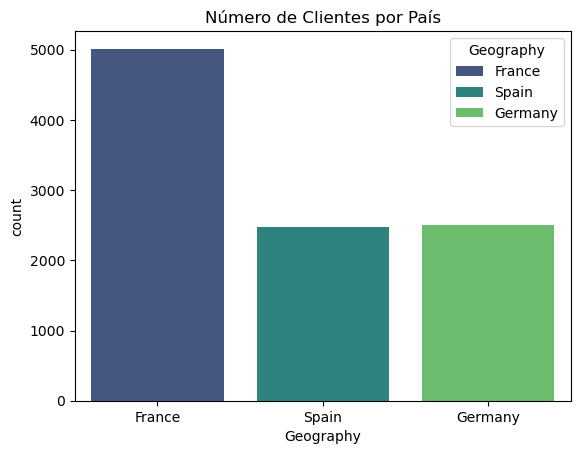

In [61]:
gr = sns.countplot(df_clientes, x='Geography', hue='Geography', palette='viridis', legend=True)
gr.set_title('Número de Clientes por País')

**Comentario:** Segun el gráfico anterior podemos visualizar que la mayor concentración de clientes esta en Francia, mientras que España y Alemania estan equilibrados en cuanto a sus datos.

- Generar gráfico de saldo por genero.

Text(0.5, 1.0, 'Saldo por Genero y País')

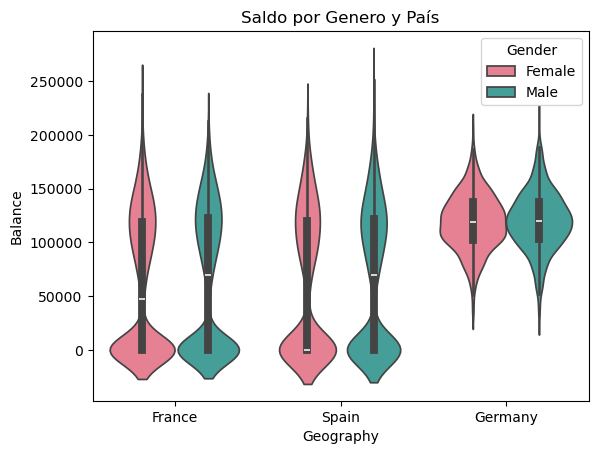

In [62]:
vl = sns.violinplot(df_clientes, x='Geography', y='Balance', hue='Gender', palette='husl')
vl.set_title('Saldo por Genero y País')

**Comentario:** Se generó un gráfico de violín con cajas interno, donde se puede visualizar que los datos estan equilibrados por género masculino y femenino. 
La localidad de Alemania es quien maneja valores altos en saldos, miestras que Francia y Alemania están equilibrados.
La mediana de los saldos para el genero masculino es mayor en relación al género femenino, sin embargo en el país de Alemania está equilibrado.

- Tipo de Tarjeta por Score Crediticio

Text(0.5, 1.0, 'Score Crediticio por Tipo de Tarjeta')

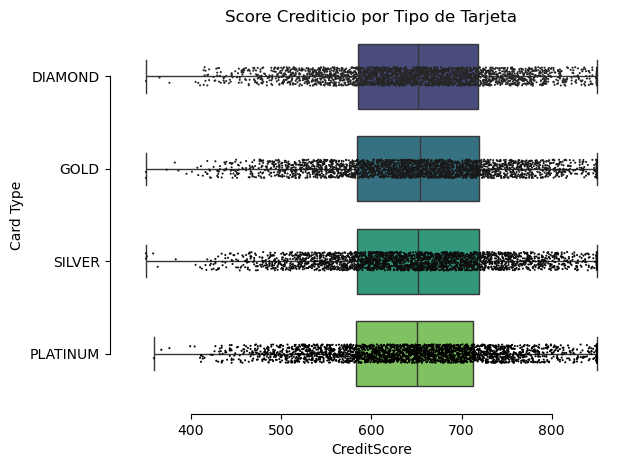

In [63]:
bp = sns.boxplot(df_clientes, x="CreditScore", y="Card Type", hue='Card Type', whis=[0, 100], width=.7, palette="viridis")
bp = sns.despine(offset=10, trim=True)
bp = sns.stripplot(df_clientes, x='CreditScore', y="Card Type",hue='Card Type', size=1.5,  palette='dark:blACK')
bp.set_title('Score Crediticio por Tipo de Tarjeta')

**Comentario:** Se generó un diagarama de cajas con puntos, donde se puede visualizar el score crediticio de los cliente vs el tipo de tarjeta de crédito. Se observa una mediana del score esta en 650 aproximadamente, con ciertos datos atípicos en la parte baja del eje del score.

**Comentario:**
- En el diagrama de caja, podemos observar que la mediana del score crediticio está alrededor de 650.
- La mayoría de los datos se encuentran en el rango entre 600 a 700.
- Se pueden observar algunos datos atípicos en valores bajos del score.

### **5. Definición de Datos de Entrenamiento y Prueba.**

In [64]:
#Dividir el conjunto de datos para train y test
from sklearn.model_selection import train_test_split  
  #Elimino la variable objetivo o etiquetas
X = df_clientes.drop('Exited', axis=1)

 #Asigno las etiquetas al objeto
y = df_clientes['Exited']

#Generamos el conjunto de datos para entrenamiento y pruebas
#x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  

#Prueba con muestreo estratificado
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=X['Tenure'], random_state=42)


print("Total de registros Dataset de Entrenamiento 80%: ",len(x_train))
print("Total de registros Etiquetas de Entrenamiento 80%: ",len(y_train))
print("Total de registros Dataset de Pruebas 20%: ",len(x_test))
print("Total de registros Etiquetas de Pruebas 20%: ",len(y_test))


Total de registros Dataset de Entrenamiento 80%:  8000
Total de registros Etiquetas de Entrenamiento 80%:  8000
Total de registros Dataset de Pruebas 20%:  2000
Total de registros Etiquetas de Pruebas 20%:  2000


### **6. Normalización y Escalado de Datos.**

- Vamos a verificar el número de ocurrencias por variable de estúdio:

In [65]:
#Verificamos numero de ocurrencias por variable
x_train.nunique()

CreditScore            458
Geography                3
Gender                   2
Age                     70
Tenure                  11
Balance               5124
NumOfProducts            4
HasCrCard                2
IsActiveMember           2
EstimatedSalary       7999
Complain                 2
Satisfaction Score       5
Card Type                4
Point Earned           784
dtype: int64

In [66]:
#Tipo de dato por variable
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8000 entries, 3653 to 573
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         8000 non-null   int64  
 1   Geography           8000 non-null   object 
 2   Gender              8000 non-null   object 
 3   Age                 8000 non-null   int64  
 4   Tenure              8000 non-null   int64  
 5   Balance             8000 non-null   float64
 6   NumOfProducts       8000 non-null   int64  
 7   HasCrCard           8000 non-null   int64  
 8   IsActiveMember      8000 non-null   int64  
 9   EstimatedSalary     8000 non-null   float64
 10  Complain            8000 non-null   int64  
 11  Satisfaction Score  8000 non-null   int64  
 12  Card Type           8000 non-null   object 
 13  Point Earned        8000 non-null   int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 937.5+ KB


#### **6.1. Variables Categóricas.**
- Vamos a normalizar las variables categoricas, creamos 2 conjuntos de datos para variables numéricas y categóricas.


In [67]:
#Seleccionamos las variables categóricas

#####Train

x_obj_train = x_train.select_dtypes(include=[np.object_])

#Configuramos para codificar las variables categóricas y Entrenamos
cat_encoder = OneHotEncoder(sparse_output=False)
cat_encoder.fit_transform(x_obj_train)  

#Aplicamos la transformación
x_train_cat = pd.DataFrame(cat_encoder.transform(x_obj_train),
                         columns=cat_encoder.get_feature_names_out(),
                         index=x_obj_train.index)

#### Test

x_obj_test = x_test.select_dtypes(include=[np.object_])

#Configuramos para codificar las variables categóricas y Entrenamos
#cat_encoder.transform(x_obj_test)  

#Aplicamos la transformación
x_test_cat = pd.DataFrame(cat_encoder.transform(x_obj_test),
                         columns=cat_encoder.get_feature_names_out(),
                         index=x_obj_test.index)

#### **6.2. Variables Numéricas.**
- Vamos a normalizar las variables numéricas, creamos 2 conjuntos de datos para variables numéricas y categóricas.

In [68]:
#Conjunto de datos con variables numéricas
x_num_train = x_train.select_dtypes(include=[np.number])
x_num_test = x_test.select_dtypes(include=[np.number])
############################################################### Normalización
#Creamos y entrenamos

pt = PowerTransformer(method='yeo-johnson') 
pt.fit_transform(x_num_train)

#Train
x_train_num = pt.transform(x_num_train)

#Test
x_test_num = pt.transform(x_num_test)

############################################################## Escalado
#Creamos y entrenamos
scaler = StandardScaler() 
scaler.fit_transform(x_train_num)

#Train
x_train_num = scaler.transform(x_train_num)

x_train_num = pd.DataFrame(scaler.transform(x_train_num),
                         columns=pt.get_feature_names_out(),
                         index=x_num_train.index)


#Test
x_test_num = scaler.transform(x_test_num)

x_test_num = pd.DataFrame(scaler.transform(x_test_num),
                         columns=pt.get_feature_names_out(),
                         index=x_num_test.index)

In [69]:
#Procedemos a volver a formar el conjunto de datos

# Concatenar las características numéricas y categóricas

### Train
x_train_final = pd.concat([x_train_num, x_train_cat], axis=1)

### Test
x_test_final = pd.concat([x_test_num, x_test_cat], axis=1)

#Convertimos a matriz Numpy

x_train_final = np.array(x_train_final)
y_train_final =np.array(y_train)

x_test_final = np.array(x_test_final)
y_test_final =np.array(y_test)


### **7. Crear el Modelo.**

#### **7.1. Modelo de Clasificasión SGDClassifier**

In [70]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)    #Creamos
sgd_clf.fit(x_train_final, y_train_final)   #Entrenamos

#Predecimos
#Train
y_pred_sgd_train = sgd_clf.predict(x_train_final)   #Predecimos

#Test
y_pred_sgd_test = sgd_clf.predict(x_test_final)   #Predecimos

In [71]:
 #Evaluamos Accuracy(Precisión) y Recall (Sensibilidad)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score

#Train
print('Accuracy Modelo SGDClassifier - Train: ', accuracy_score(y_train, y_pred_sgd_train))
print('Recall Modelo SGDClassifier - Train: ', recall_score(y_train, y_pred_sgd_train))

#Test
print('Accuracy Modelo SGDClassifier - Test: ', recall_score(y_test, y_pred_sgd_test))
print('Recall Modelo SGDClassifier - Test: ', accuracy_score(y_test, y_pred_sgd_test))

Accuracy Modelo SGDClassifier - Train:  0.9985
Recall Modelo SGDClassifier - Train:  0.9975108898568762
Accuracy Modelo SGDClassifier - Test:  1.0
Recall Modelo SGDClassifier - Test:  0.999


              Reporte de Precisión Vs Sensibilidad - Train

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6393
           1       1.00      1.00      1.00      1607

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



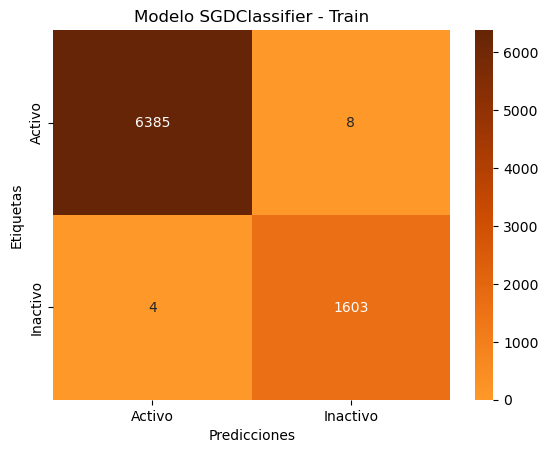

In [72]:
#Generamos la matriz de confusión para validar resultados de Train
cm= confusion_matrix(y_train_final, y_pred_sgd_train)
cm

hm = sns.heatmap(cm, annot=True, center=0,  cmap='YlOrBr', cbar=True, vmin=0, fmt='d',
            xticklabels=['Activo', 'Inactivo'],
            yticklabels=['Activo', 'Inactivo']
            )
hm.set_title('Modelo SGDClassifier - Train')
hm.set(xlabel='Predicciones')
hm.set(ylabel='Etiquetas')

print('              Reporte de Precisión Vs Sensibilidad - Train\n')
print(classification_report(y_train_final,y_pred_sgd_train))

              Reporte de Precisión Vs Sensibilidad - Test

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1569
           1       1.00      1.00      1.00       431

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



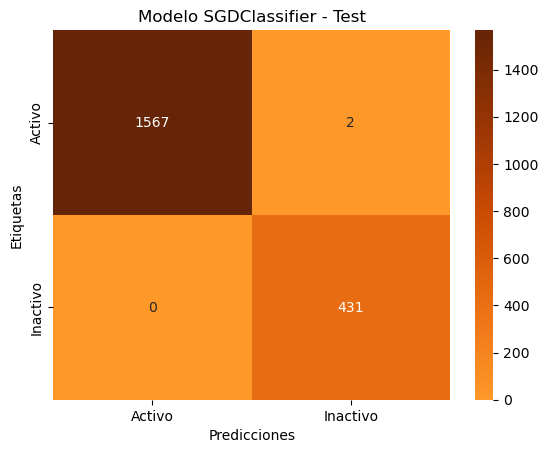

In [73]:
#Generamos la matriz de confusión para validar resultados de Test
cm= confusion_matrix(y_test_final, y_pred_sgd_test)
cm

hm = sns.heatmap(cm, annot=True, center=0,  cmap='YlOrBr', cbar=True, vmin=0, fmt='d',
            xticklabels=['Activo', 'Inactivo'],
            yticklabels=['Activo', 'Inactivo']
            )
hm.set_title('Modelo SGDClassifier - Test')
hm.set(xlabel='Predicciones')
hm.set(ylabel='Etiquetas')

print('              Reporte de Precisión Vs Sensibilidad - Test\n')
print(classification_report(y_test_final,y_pred_sgd_test))

#### **7.2. Modelo de Random Forest Classifier**

In [74]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 42)    #Creamos
rf_clf.fit(x_train_final, y_train_final)    #Entrenamos

#Predecimos
#Train
y_pred_rf_train = rf_clf.predict(x_train_final)

#Test
y_pred_rf_test = rf_clf.predict(x_test_final)

In [75]:
 #Evaluamos Accuracy(Precisión) y Recall (Sensibilidad)

#Train
print('Accuracy Modelo SGDClassifier - Train: ', accuracy_score(y_train_final, y_pred_rf_train))
print('Recall Modelo SGDClassifier - Train: ', recall_score(y_train_final, y_pred_rf_train))

#Test
print('Accuracy Modelo SGDClassifier - Test: ', accuracy_score(y_test_final, y_pred_rf_test))
print('Recall Modelo SGDClassifier - Test: ', recall_score(y_test_final, y_pred_rf_test))

Accuracy Modelo SGDClassifier - Train:  1.0
Recall Modelo SGDClassifier - Train:  1.0
Accuracy Modelo SGDClassifier - Test:  0.999
Recall Modelo SGDClassifier - Test:  1.0


              Reporte de Precisión Vs Sensibilidad

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6393
           1       1.00      1.00      1.00      1607

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



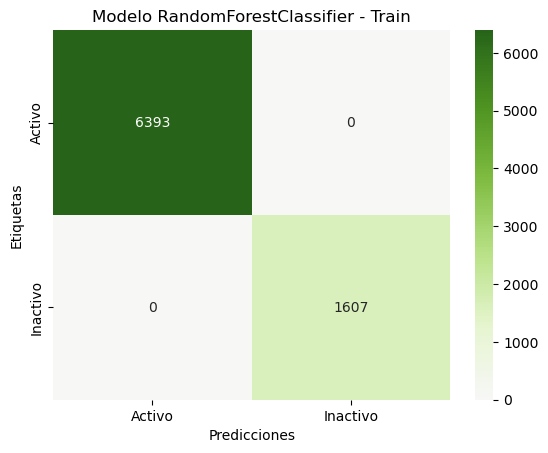

In [76]:
#Generamos la matriz de confusión para validar resultados de Train
cm= confusion_matrix(y_train_final, y_pred_rf_train)
cm

hm = sns.heatmap(cm, annot=True, center=0,  cmap='PiYG', cbar=True, vmin=0, fmt='d',
            xticklabels=['Activo', 'Inactivo'],
            yticklabels=['Activo', 'Inactivo']
            )
hm.set_title('Modelo RandomForestClassifier - Train')
hm.set(xlabel='Predicciones')
hm.set(ylabel='Etiquetas')

print('              Reporte de Precisión Vs Sensibilidad\n')
print(classification_report(y_train_final,y_pred_rf_train))

              Reporte de Precisión Vs Sensibilidad

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1569
           1       1.00      1.00      1.00       431

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



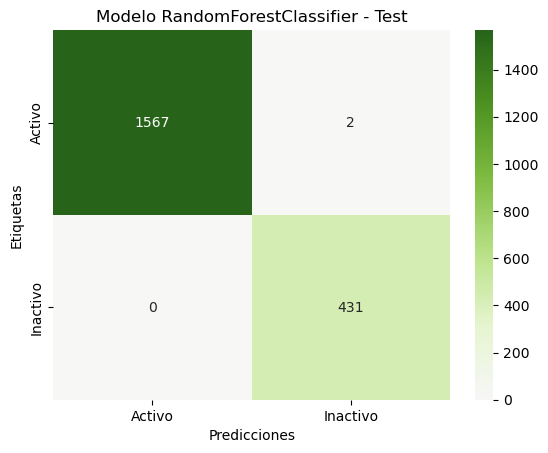

In [77]:
#Generamos la matriz de confusión para validar resultados de Test
cm= confusion_matrix(y_test_final, y_pred_rf_test)
cm

hm = sns.heatmap(cm, annot=True, center=0,  cmap='PiYG', cbar=True, vmin=0, fmt='d',
            xticklabels=['Activo', 'Inactivo'],
            yticklabels=['Activo', 'Inactivo']
            )
hm.set_title('Modelo RandomForestClassifier - Test')
hm.set(xlabel='Predicciones')
hm.set(ylabel='Etiquetas')

print('              Reporte de Precisión Vs Sensibilidad\n')
print(classification_report(y_test_final,y_pred_rf_test))

#### **7.3. Modelo SVM**

In [78]:
from sklearn.svm import LinearSVC

svm_clf = LinearSVC(C=1, random_state=42)
svm_clf.fit(x_train_final, y_train_final)    #Entrenamos

#Predecimos
#Train
y_pred_svm_train = svm_clf.predict(x_train_final)

#Test
y_pred_svm_test = svm_clf.predict(x_test_final)

In [79]:
 #Evaluamos Accuracy(Precisión) y Recall (Sensibilidad)

#Train
print('Accuracy Modelo SVM - Train: ', accuracy_score(y_train_final, y_pred_svm_train))
print('Recall Modelo SVM - Test: ', recall_score(y_train_final, y_pred_svm_train))

#Test
print('Accuracy Modelo SVM - Test: ', accuracy_score(y_test_final, y_pred_svm_test))
print('Recall Modelo SVM - Test: ', recall_score(y_test_final, y_pred_svm_test))

Accuracy Modelo SVM - Train:  0.9985
Recall Modelo SVM - Test:  0.9975108898568762
Accuracy Modelo SVM - Test:  0.999
Recall Modelo SVM - Test:  1.0


              Reporte de Precisión Vs Sensibilidad

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6393
           1       1.00      1.00      1.00      1607

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



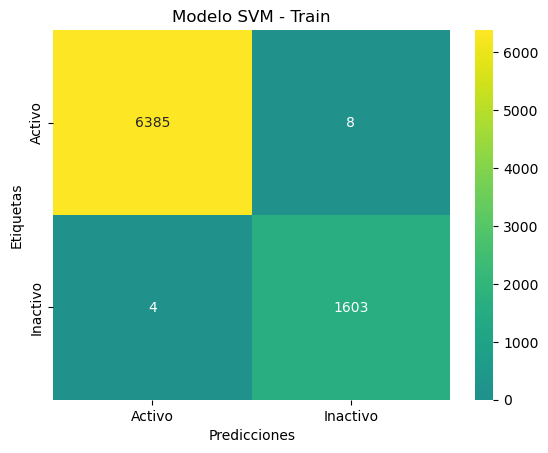

In [80]:
#Generamos la matriz de confusión para validar resultados de Train
cm= confusion_matrix(y_train_final, y_pred_svm_train)
cm

hm = sns.heatmap(cm, annot=True, center=0,  cmap='viridis', cbar=True, vmin=0, fmt='d',
            xticklabels=['Activo', 'Inactivo'],
            yticklabels=['Activo', 'Inactivo']
            )
hm.set_title('Modelo SVM - Train')
hm.set(xlabel='Predicciones')
hm.set(ylabel='Etiquetas')

print('              Reporte de Precisión Vs Sensibilidad\n')
print(classification_report(y_train_final,y_pred_svm_train))

              Reporte de Precisión Vs Sensibilidad

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1569
           1       1.00      1.00      1.00       431

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



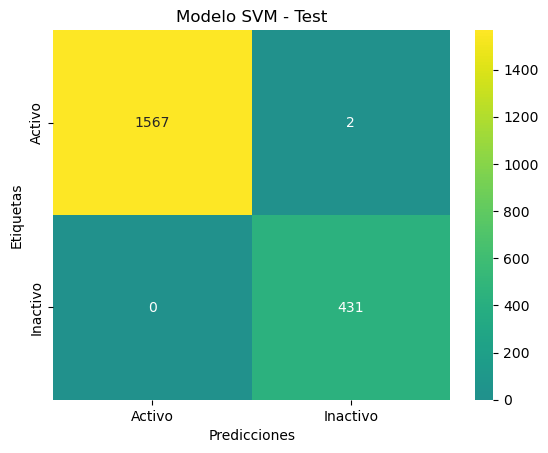

In [81]:
#Generamos la matriz de confusión para validar resultados de Test
cm= confusion_matrix(y_test_final, y_pred_svm_test)
cm

hm = sns.heatmap(cm, annot=True, center=0,  cmap='viridis', cbar=True, vmin=0, fmt='d',
            xticklabels=['Activo', 'Inactivo'],
            yticklabels=['Activo', 'Inactivo']
            )
hm.set_title('Modelo SVM - Test')
hm.set(xlabel='Predicciones')
hm.set(ylabel='Etiquetas')

print('              Reporte de Precisión Vs Sensibilidad\n')
print(classification_report(y_test_final,y_pred_svm_test))